In [1]:
# Modules used on the analysis
import sys
import pickle
sys.path.append("../tools/")
import pandas as pd
import numpy as np
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
import seaborn as sns
import matplotlib.pyplot as plt

# set random seed
np.random.seed(1234)

In [2]:
# Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)

# Create DataFrame from data_dict 
df_enron = pd.DataFrame.from_dict(data_dict, orient='index')

In [3]:
# Inspect Dataframe
df_enron.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
ALLEN PHILLIP K,201955,2902,2869717,4484442,NaN,4175000,phillip.allen@enron.com,-126027,-3081055,1729541,...,47,1729541,2195,152,65,False,304805,1407,126027,NaN
BADUM JAMES P,NaN,NaN,178980,182466,NaN,NaN,NaN,NaN,NaN,257817,...,NaN,257817,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,NaN,NaN,james.bannantine@enron.com,-560222,-5104,5243487,...,39,4046157,29,864523,0,False,NaN,465,1757552,NaN
BAXTER JOHN C,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,...,NaN,6680544,NaN,2660303,NaN,False,1586055,NaN,3942714,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,frank.bay@enron.com,-82782,-201641,63014,...,NaN,NaN,NaN,69,NaN,False,NaN,NaN,145796,NaN


In [4]:
# Verify datatypes for each column
df_enron.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
salary                       146 non-null object
to_messages                  146 non-null object
deferral_payments            146 non-null object
total_payments               146 non-null object
loan_advances                146 non-null object
bonus                        146 non-null object
email_address                146 non-null object
restricted_stock_deferred    146 non-null object
deferred_income              146 non-null object
total_stock_value            146 non-null object
expenses                     146 non-null object
from_poi_to_this_person      146 non-null object
exercised_stock_options      146 non-null object
from_messages                146 non-null object
other                        146 non-null object
from_this_person_to_poi      146 non-null object
poi                          146 non-null bool
long_term_incentive          146 non-null object


In [5]:
# Change columns type to numeric
df_enron = df_enron.apply(pd.to_numeric, errors='coerce')

# Fillna with 0 to replace NaN
df_enron = df_enron.fillna(0.0)

# Rescale feature values with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df_enron.drop('poi', axis=1))
y = df_enron.poi

In [6]:
# Inspect X
X

array([[7.56265983e-03, 1.91563800e-01, 9.23453242e-02, ...,
        2.54845137e-01, 2.05415103e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.74544552e-03, ...,
        0.00000000e+00, 1.95934169e-02, 0.00000000e+00],
       [1.78623393e-05, 3.73622021e-02, 3.18462472e-03, ...,
        8.42238725e-02, 3.28153718e-02, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 3.18462472e-03, ...,
        0.00000000e+00, 1.95934169e-02, 0.00000000e+00],
       [5.93175710e-03, 0.00000000e+00, 3.18462472e-03, ...,
        0.00000000e+00, 4.64969932e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.18462472e-03, ...,
        0.00000000e+00, 1.95934169e-02, 0.00000000e+00]])

In [7]:
# Define relative importance for the features
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=df_enron.drop(
                                                           'poi', axis=1).columns)

[0.06536883 0.03388887 0.02059565 0.03835319 0.01155917 0.09785213
 0.         0.00082316 0.08366968 0.09796924 0.04283392 0.07021488
 0.09088855 0.03868146 0.0798469  0.04749414 0.05357948 0.04248256
 0.08248641 0.0014118 ]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [8]:
# Convert results to Dataframe and sort it
df_features_importance = pd.DataFrame(feat_importances, columns=['values'])
df_features_importance = df_features_importance.sort_values(by='values')

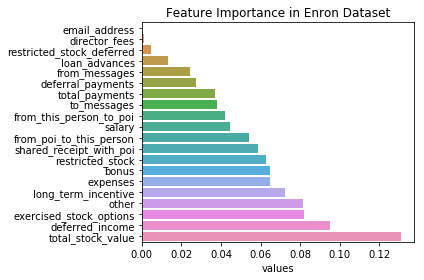

In [28]:
# Plot the feature importance as horizontal barplot
ax = sns.barplot(y=df_features_importance.index, x='values', data=df_features_importance,
           orient='h')
ax.set_title('Feature Importance in Enron Dataset')
plt.tight_layout()
ax.figure.savefig('feature_importance.png', dpi=300, orientation='landscape')

In [10]:
# Set features to be used on analysis
features_list = ['poi',
                 'deferred_income',
                 'expenses',
                 'exercised_stock_options',
                 'restricted_stock',
                 'from_this_person_to_poi',
                 'salary',
                 'total_stock_value',
                 'bonus',
                 'shared_receipt_with_poi',
                 'other',
                 'from_poi_to_this_person',
                 'long_term_incentive',
                 'total_payments',
                 'from_messages',
                 'to_messages',
                 'deferral_payments']

In [16]:
# Redefine X
X = scaler.fit_transform(df_enron[features_list].drop('poi', axis=1))

In [18]:
# As mentioned on the report, we applied PCA to define outliers
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
dim_red = pca.fit_transform(X)

# Transform PCA results into Dataframe
pca_df = pd.DataFrame(dim_red, columns=[
    'PCA1', 'PCA2'], index=df_enron.index)

# Concatenate with y series as for labels
pca_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)

# Get z-score for each component
pca_df['PCA1_zscore'] = (pca_df.PCA1 - pca_df.PCA1.mean()) / pca_df.PCA1.std()
pca_df['PCA2_zscore'] = (pca_df.PCA2 - pca_df.PCA2.mean()) / pca_df.PCA2.std()

# Get rows that are 3 standard deviations away from meanlist_outliers_pca
list_outliers_pca = (pca_df[(np.abs(pca_df.PCA1_zscore) > 3)
                            | (np.abs(pca_df.PCA2_zscore) > 3)]).index

In [19]:
# Inspect pca_df
pca_df.head()

,PCA1,PCA2,poi,PCA1_zscore,PCA2_zscore
ALLEN PHILLIP K,0.177156,0.087775,False,0.639173,0.319719
BADUM JAMES P,-0.154380,-0.085163,False,-0.556995,-0.310204
BANNANTINE JAMES M,-0.057899,-0.039068,False,-0.208898,-0.142305
BAXTER JOHN C,-0.177314,0.001008,False,-0.639742,0.003670
BAY FRANKLIN R,-0.158158,-0.071089,False,-0.570628,-0.258940


In [20]:
# Function to create new column with labels of poi
def poi_n_poi(row):
    if row.poi == False:
        return 'non-poi'
    elif row.poi == True:
        return 'poi'
    else:
        return None

# Apply function to new pca_df column 'label'
pca_df['label'] = pca_df.apply(poi_n_poi, axis=1)

In [21]:
# Set label values for outliers
pca_df.loc[list(list_outliers_pca), 'label'] = 'outlier'

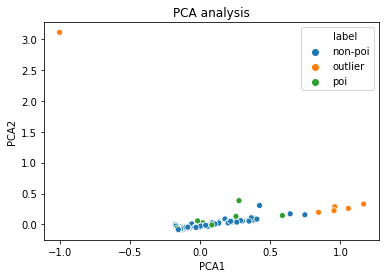

In [22]:
# Plot the 2 PCA components as scatter to visualize outliers
ax = sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='label')
ax.set_title('PCA analysis')
ax.figure.savefig('PCA_analysis_plot.png', dpi=300)

In [23]:
# Remove outliers from the dataset
df_features_no_outliers = df_enron.drop(list_outliers_pca)
X = df_features_no_outliers.drop('poi', axis=1)
y = df_features_no_outliers.poi

In [24]:
# Get ration of POI and non-POI
poi_class = df_features_no_outliers['poi'].value_counts()
print(poi_class / df_features_no_outliers.shape[0])

False    0.878571
True     0.121429
Name: poi, dtype: float64


In [25]:
# Set random seed to reproductibilty
np.random.seed(1234)

# Generate artificial samples with SMOTE to deal with class imbalance
from imblearn.over_sampling import SMOTE

# Define the resampling method
method = SMOTE(kind='regular', random_state=42)

# Create the resampled feature set
X_resampled, y_resampled = method.fit_sample(X, y)

# Use shuffle to mix generated synthetic samples
from sklearn.utils import shuffle
X_resampled,  y_resampled = shuffle(X_resampled,  y_resampled)

In [26]:
# Split your data X and y, into a training and a test set and fit the
# pipeline onto the training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled,  y_resampled, test_size=0.3, random_state=0)

In [28]:
# Test the performance of a few classifiers
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
print(clf)
print('GaussianNB')
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
probs = clf.predict_proba(X_test)
# Print the ROC curve, classification report and confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
print(roc_auc_score(y_test, probs[:, 1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
print(clf)
print('RandomForestClassifier')
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
probs = clf.predict_proba(X_test)
# Print the ROC curve, classification report and confusion matrix
print(roc_auc_score(y_test, probs[:, 1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
print(clf)
print('LogisticRegression')
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
probs = clf.predict_proba(X_test)
# Print the ROC curve, classification report and confusion matrix
print(roc_auc_score(y_test, probs[:, 1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

GaussianNB(priors=None, var_smoothing=1e-09)
GaussianNB
0.8683823529411765
              precision    recall  f1-score   support

       False       0.50      0.85      0.63        34
        True       0.69      0.28      0.39        40

   micro avg       0.54      0.54      0.54        74
   macro avg       0.59      0.56      0.51        74
weighted avg       0.60      0.54      0.50        74

[[29  5]
 [29 11]]
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
RandomForestClassifier
0.9632352941176471
              precision    recall  f1-score   support

       False       0.90      0.82      0.86        34
        True  

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [29]:
## Use GridSearchCV to optimize RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid 
param_grid = {
    'max_depth': [80, 90, 100, 110,150, 200],
    'max_features': [None, 'auto', 2, 3, 6, 9, 12],
    'min_samples_leaf': [2, 4, 6, 12],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000],
    'class_weight': ['balanced','balanced_subsample', {0:1, 1:6}, {0:1, 1:3}] 
}

In [18]:
# Define which model to use
model = RandomForestClassifier()
# Instantiate the grid search model
grid_search_model = GridSearchCV(estimator = model, 
param_grid = param_grid, cv = 5,
n_jobs = -1, scoring='f1', verbose=10)

grid_search_model.fit(X_train, y_train)
print(grid_search_model.best_params_)
print(grid_search_model.best_estimator_)
print(grid_search_model.best_score_)

Fitting 5 folds for each of 8064 candidates, totalling 40320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 9232 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 9369 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 9506 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 9645 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 9925 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 10066 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 10209 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 10352 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 10497 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 10642 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 10789 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 10936 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 11085 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 11234 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 11385 tasks      |

[Parallel(n_jobs=-1)]: Done 35097 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 35362 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done 35629 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 35896 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 36165 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 36434 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 36705 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 36976 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 37249 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 37522 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 37797 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 38072 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 38349 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 38626 tasks      | elapsed: 29.3min
[Parallel(n_jobs=-1)]: Done 38905 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 39184 tasks 

{'class_weight': 'balanced_subsample', 'max_depth': 100, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=100, max_features=6,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
0.8785327138985675


[Parallel(n_jobs=-1)]: Done 40320 out of 40320 | elapsed: 30.5min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [35]:
# Get performance metrics for the chosen model and parameters
np.random.seed(1234)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=100, max_features=6,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
print(clf)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
probs = clf.predict_proba(X_test)
print(roc_auc_score(y_test, probs[:, 1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))


RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=100, max_features=6,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
0.9437545653761871
              precision    recall  f1-score   support

       False       0.82      0.86      0.84        37
        True       0.86      0.81      0.83        37

   micro avg       0.84      0.84      0.84        74
   macro avg       0.84      0.84      0.84        74
weighted avg       0.84      0.84      0.84        74

[[32  5]
 [ 7 30]]


f1=0.000 auc=0.400 ap=0.694


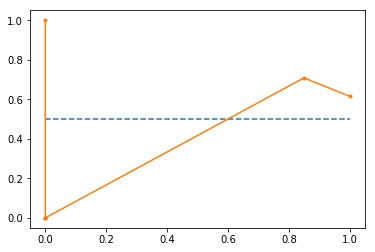

In [31]:
# Get Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from matplotlib import pyplot

probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model.predict(X_test)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)
# calculate F1 score
f1 = f1_score(y_test, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')
# show the plot
plt.show()

AUC: 0.664


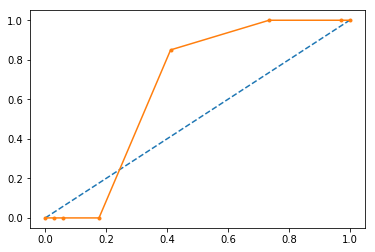

In [32]:
# ROC Curves and AUC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [34]:
# Cross Validation of model using StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score, recall_score, precision_score, f1_score
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
sss.get_n_splits(X_resampled, y_resampled)

recall_score_list = []
precision_score_list = []
f1_score_list = []

for train_index, test_index in sss.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled[train_index], X_resampled[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]
    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)
    probs = clf.predict_proba(X_test)

    # Print the ROC curve, classification report and confusion matrix
    print(roc_auc_score(y_test, probs[:, 1]))
    print(classification_report(y_test, predicted))
    print(confusion_matrix(y_test, predicted))
    recall_score_list.append(recall_score(y_test, predicted))
    precision_score_list.append(precision_score(y_test, predicted))
    f1_score_list.append(f1_score(y_test, predicted))

print('Recall Score Mean: {}'.format(np.mean(recall_score_list)))
print('Precision Score Mean: {}'.format(np.mean(precision_score_list)))
print('F1 Score Mean: {}'.format(np.mean(f1_score_list)))


0.9861212563915268
              precision    recall  f1-score   support

       False       0.94      0.92      0.93        37
        True       0.92      0.95      0.93        37

   micro avg       0.93      0.93      0.93        74
   macro avg       0.93      0.93      0.93        74
weighted avg       0.93      0.93      0.93        74

[[34  3]
 [ 2 35]]
0.9656683710737765
              precision    recall  f1-score   support

       False       1.00      0.84      0.91        37
        True       0.86      1.00      0.92        37

   micro avg       0.92      0.92      0.92        74
   macro avg       0.93      0.92      0.92        74
weighted avg       0.93      0.92      0.92        74

[[31  6]
 [ 0 37]]
0.9649379108838568
              precision    recall  f1-score   support

       False       0.92      0.92      0.92        37
        True       0.92      0.92      0.92        37

   micro avg       0.92      0.92      0.92        74
   macro avg       0.92      0.92